# Data exploration

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.patches import Rectangle, Polygon, Patch
%matplotlib inline

import cv2

In [3]:
import sys
sys.path.append("../common/")

In [4]:
from data_utils import GRID_SIZE, TRAIN_WKT, LABELS, get_resized_polygons, TRAIN_IMAGE_IDS, ALL_IMAGE_IDS, generate_label_image
from image_utils import get_image_data, generate_pansharpened, DATA_3_BANDS, DATA_16_BANDS
from visu_utils import display_img_1b, display_img_3b, display_img_8b, display_polygons, display_labels

In [5]:
#!ls {DATA_16_BANDS} | head

## Visualize a training image

In [5]:
TRAIN_IMAGE_IDS

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

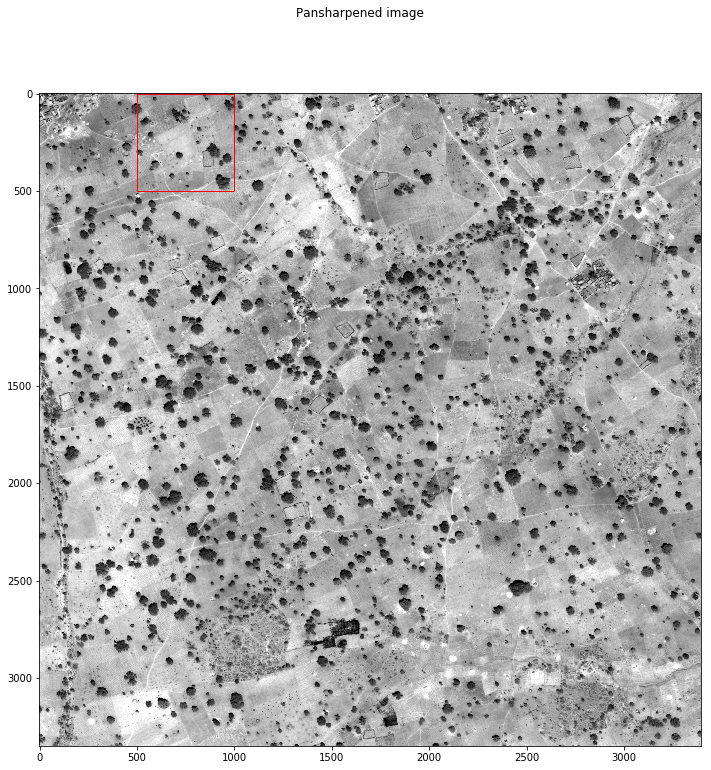

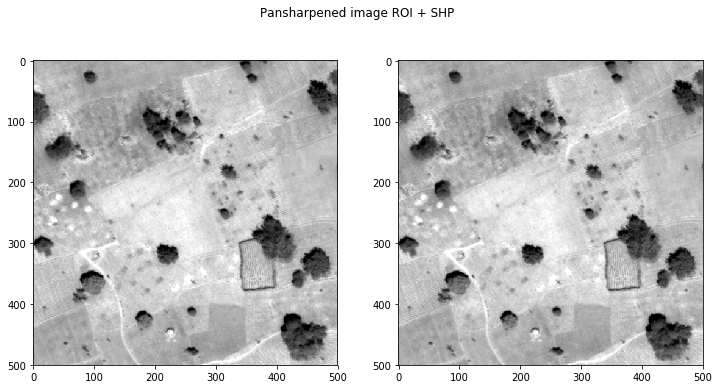

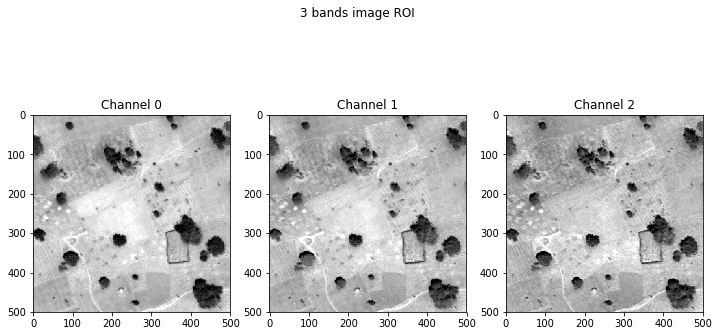

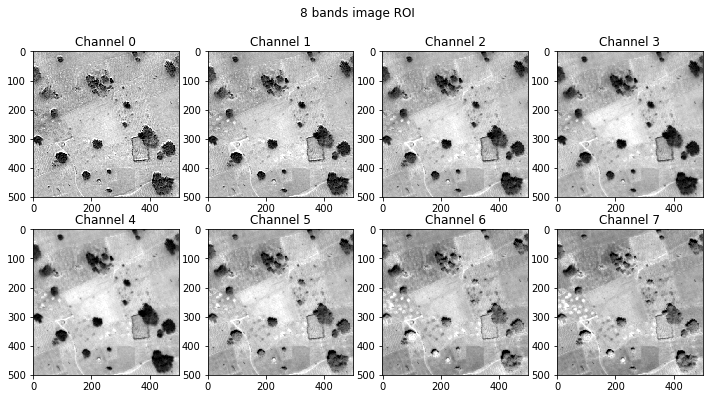

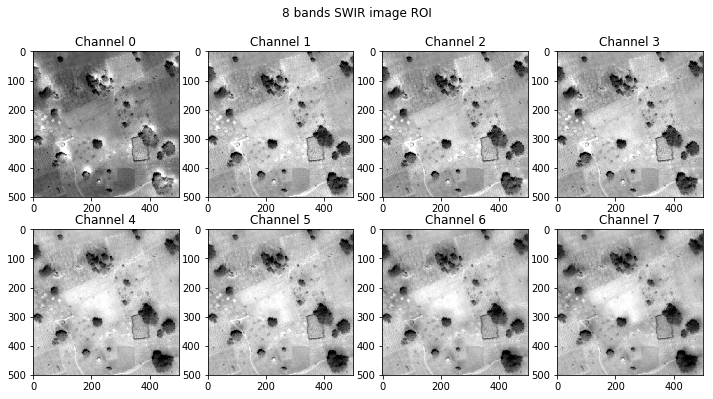

In [22]:
from ipywidgets import interact, IntSlider, FloatSlider   

image_id = "6020_0_0"

generate_pansharpened(image_id, 'ms')
generate_pansharpened(image_id, 'swir')

try:
    label_img = generate_label_image(image_id)
    is_test_image=False
except:
    is_test_image=True
    
img_pan = get_image_data(image_id, 'pan')


try:
    img_3b = get_image_data(image_id, '3b')
except:
    img_3b = None
    
img_ms = get_image_data(image_id, 'ms_pan')
img_swir = get_image_data(image_id, 'swir_pan')


fig_size = (12, 6)
plus_shapes = False
def interactive_visu(roi_x, roi_w, roi_y, roi_h, alpha):
    
    roi = [roi_x, roi_y, roi_x+roi_w, roi_y+roi_h]
    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    display_img_1b(img_pan)
    if not is_test_image:
        display_labels(label_img, alpha=alpha)
    ax.add_patch(Rectangle((roi_x, roi_y), roi_w, roi_h, alpha=1, facecolor='none', edgecolor='red'))
    plt.suptitle("Pansharpened image")
    
    plt.figure(figsize=fig_size)
    plt.subplot(121)
    display_img_1b(img_pan, roi)
    plt.suptitle("Pansharpened image ROI")
    plt.subplot(122)
    display_img_1b(img_pan, roi)
    if not is_test_image:
        display_labels(label_img, roi, alpha=alpha)
    plt.suptitle("Pansharpened image ROI + SHP")


    
    if img_3b is not None:
        plt.figure(figsize=fig_size)
        ax_array = display_img_3b(img_3b, roi)
        plt.suptitle("3 bands image ROI")
        if plus_shapes and not is_test_image:
            display_labels(label_img, roi, ax_array, alpha=alpha)
        
    
    plt.figure(figsize=fig_size)
    ax_array = display_img_8b(img_ms, roi)
    plt.suptitle("8 bands image ROI")
    if plus_shapes and not is_test_image:
        display_labels(label_img, roi, ax_array, alpha=alpha)
        
        

    plt.figure(figsize=fig_size)
    ax_array = display_img_8b(img_swir, roi)
    #ax_array = display_img_8b(img_swir, [r/4/6 for r in roi])
    plt.suptitle("8 bands SWIR image ROI")
    if plus_shapes and not is_test_image:
        display_labels(label_img, roi, ax_array, alpha=alpha)

    
_ = interact(interactive_visu,           
         roi_x=IntSlider(value=500, min=0, max=3500, continuous_update=False), 
         roi_w=IntSlider(value=500, min=150, max=750, continuous_update=False), 
         roi_y=IntSlider(value=1, min=0, max=3500, continuous_update=False), 
         roi_h=IntSlider(value=500, min=150, max=750, continuous_update=False),
         alpha=FloatSlider(value=0.5, min=0, max=1.0, step=0.1, continuous_update=False))

## Visualize tiles of XYZW image, e.g. '6010'

In [15]:
tile_size = (256, 256)
n, m = 5, 5

In [16]:
ids = "6010"

complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = ids + "_%i_%i" % (i, j)
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img

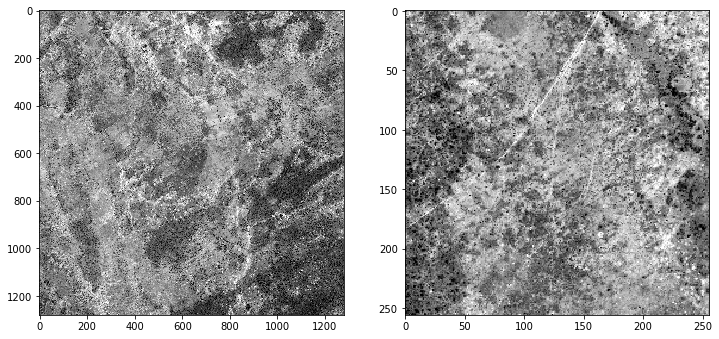

In [19]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[128,128,128+256,128+256])

In [20]:
ids = "6020"
complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = ids + "_%i_%i" % (i, j)
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img

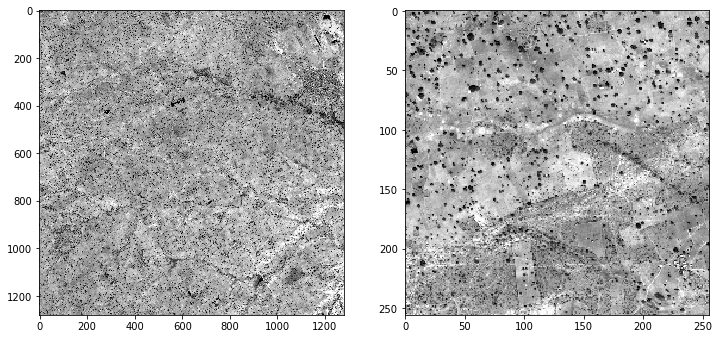

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[128,128,128+256,128+256])

In [23]:
ids = "6030"
complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = ids + "_%i_%i" % (i, j)
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img

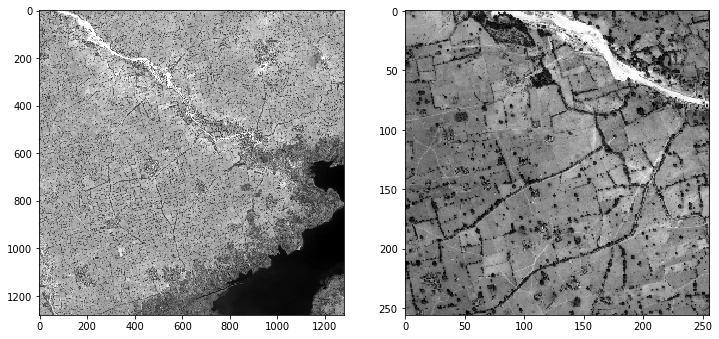

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[128,128,128+256,128+256])

##  Visualize all 25 training images

In [9]:
TRAIN_IMAGE_IDS

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'], dtype=object)

In [10]:
tile_size = (512, 512)
n, m = 5, 5

In [14]:
train_ids

['6010_1_2',
 '6010_4_2',
 '6010_4_4',
 '6040_1_0',
 '6040_1_3',
 '6040_2_2',
 '6040_4_4',
 '6060_2_3',
 '6070_2_3',
 '6090_2_0',
 '6100_1_3',
 '6100_2_2',
 '6100_2_3',
 '6110_1_2',
 '6110_3_1',
 '6110_4_0',
 '6120_2_0',
 '6120_2_2',
 '6140_1_2',
 '6140_3_1',
 '6150_2_3',
 '6160_2_1',
 '6170_0_4',
 '6170_2_4',
 '6170_4_1']

In [ ]:
# '6110_1_2','6140_1_2',

In [15]:
complete_image = np.zeros((5*tile_size[0], 5*tile_size[1]), dtype=np.uint16)
train_ids = sorted(TRAIN_IMAGE_IDS)
counter = 0
for i in range(n):
    ys = i*tile_size[1]
    ye = ys + tile_size[1]
    for j in range(m):
        xs = j*tile_size[0]
        xe = xs + tile_size[0]
        image_id = train_ids[counter]; counter+=1
        img = get_image_data(image_id, 'pan')
        img = cv2.resize(img, dsize=tile_size)
        complete_image[ys:ye, xs:xe] = img[:,:,0] if len(img.shape) > 2 else img

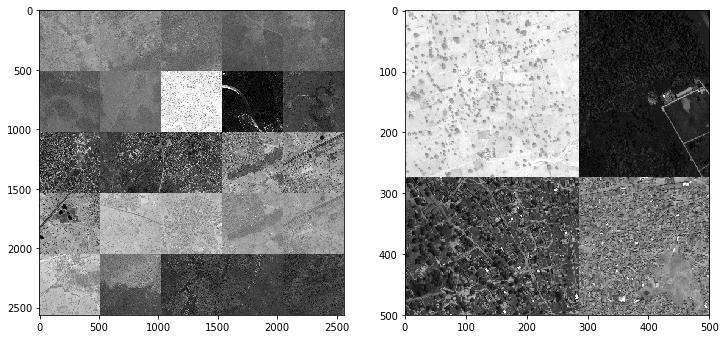

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(121)
display_img_1b(complete_image)
plt.subplot(122)
display_img_1b(complete_image, roi=[1250,750,1250+500,750+500])